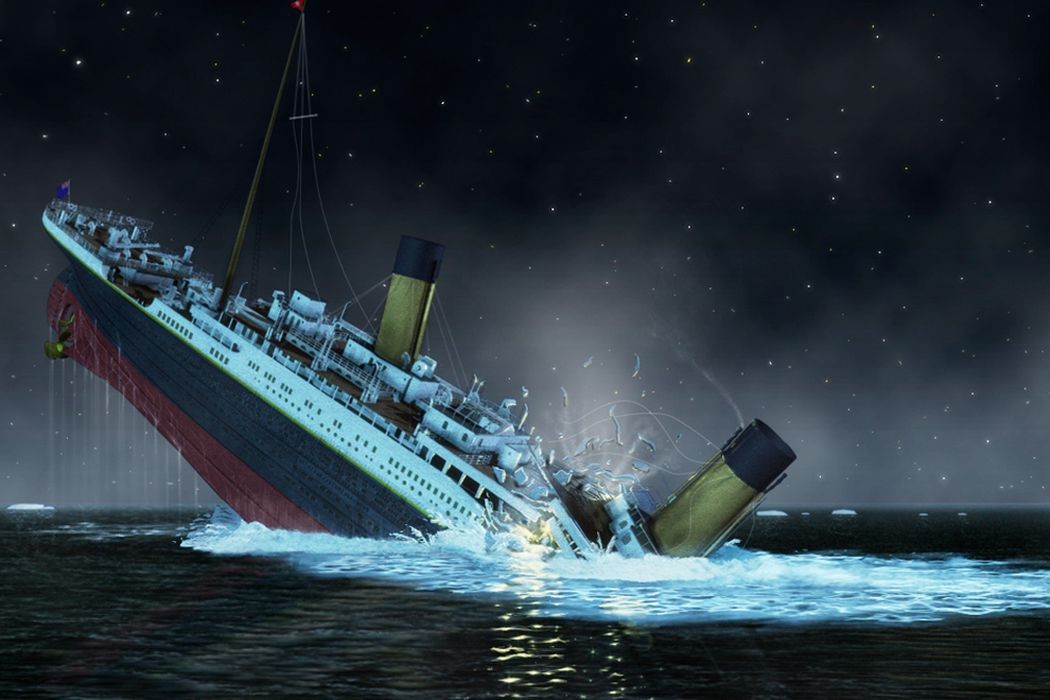

# Sobre o Titanic
Titanic foi um transatlântico comercial operado pela White Star Line, construído para se tornar o navio mais luxuoso do inicio do século. A embarcação partiu em sua viagem de inauguração no porto de Southampton com destino a Nova Iorque. Durante o seu trajeto, o navio parou em três portos considerando o ponto inicial: Southampton (Inglaterra), Cherbourg-Octeville (França) e Queenstown (Irlanda). No dia 14 de abril, houve a colisão com um iceberg na proa dianteira do lado direito às 23h40, posteriormente naufragando na madrugada do dia seguinte. A viagem contava uma estimativa de 2.224 passageiros a bordo, onde mais de 1.500 vidas de passageiros e tripulantes foram perdidas. O naufrágio ficou conhecido como um dos mais mortais desastres marítimos comerciais. O desafio requer o uso de diversos algoritmos de aprendizado de máquina para dizer se os passageiros sobreviverão ou não. Porém, antes de aplicar qualquer algoritmo, também precisamos verificar a existência de dados ausentes ou que necessitam receber algum tratamento.

# Dicionário de Dados

- **Survived**: 1 = Sim; 0 = Não;

- **Pclass**: Indica a classe econômica. 1 = Alta; 2 = Média; 3 = Baixa;

- **sibsp**: Quantidade de cônjugues ou irmãos a bordo;

- **parch**: Quantidade de parentes ou filhos a bordo;

- **Ticket**: Número do ticket;

- **Fare**: Tarifa do passageiro;

- **Cabin**: Número da cabine embarcada;

- **Embarked**: Porto embarcado. C = Cherbourg; Q = Queenstown; S = Southampton;

- **Name**: Nome do passageiro;

- **Sex**: Sexo do passageiro; e

- **Age**: Idade do passageiro.

# Perguntas

- Qual a idade do passageiro mais velho?
- Qual a idade do passageiro mais novo?
- Qual a média da idade dos passageiros?
- Qual o total de passageiros por sexo?
- Qual o total de passageiros por portos?
- Qual a idade do sobrevivente mais velho do sexo feminino e masculino?
- Qual a diferença dos sobreviventes por idade e sexo?
- Qual o total número de mortos e sobreviventes?
- Qual foi o sexo que obteve a maior quantidade de mortos e sobreviventes?
- Qual foi a classe econômica registrada com o maior número de mortos e sobreviventes?
- Existem valores nulos no conjunto de dados? Em quais colunas?
- Qual a distribuição de frequência de idades?
- Qual a distribuição de frequências de idade por mortos e sobreviventes?
- Qual a distribuição de valores dos tickets por classe econômica? Os valores variam entre sexo?
- Qual foi a maior taxa de sobrevivência dos passageiros em relação ao sexo?
- Qual foi a maior taxa de sobrevivência dos passageiros em relação a classe econômica?
- Qual foi a maior taxa de sobrevivência dos passageiros em relação ao porto de embarque?

## Carregando as bibliotecas

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
colors = ['#ea2a15', '#4682B4', '#076461']
sns.set_palette(colors)

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

## Importanto os dados e verificando as observações

In [80]:
df_train = pd.read_csv('https://github.com/wors/ds-projects/tree/main/ds-projetc-titanic/data/raw')

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [83]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q


Observando os dados das 5 primeiras e últimas linhas do conjunto de dados, é possível observar que existem valores **NaN** nas colunas **Age** e **Cabin**, será preciso verificar se outras colunas também estão na mesma situação. As colunas **Name**, **Ticket** e **Cabin** não são valores que precisam ser estudados na análise exploratória e prediditiva e, logo, podem ser excluídos do conjunto.

In [84]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00
Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00
SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00
Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


- Ao gerar a descrição estatística, pode-se observar que a idade máxima é de 80 anos. Na  época do naufrágio do Titanic, a expectativa de vida era em torno de 52 anos. Até os 75% dos dados do conjunto chegam em 38 anos, precisaremos verificar se manteremos ou iremos retirar este outlier.
- Na coluna Fare, será preciso estudar os outliers que estão distorcendo o valor da média, que corresponde a 32.20 e a mediana está correspondendo a 14.45. Todas as demais colunas possuem uma mediana aproximada da média

In [85]:
sum(df_train.duplicated())

0

# Análise de dados

In [165]:
((df_train.groupby(['Sex','Survived']).agg({'Survived':'count'}) * 100) / df_train.groupby('Sex').agg({'Survived':'count'}))

Survived
Sex    Survived          
female 0            25.80
       1            74.20
male   0            81.11
       1            18.89

In [166]:
((df_train.groupby(['Pclass','Survived']).agg({'Survived':'count'}) * 100) / df_train.groupby('Pclass').agg({'Survived':'count'}))

Survived
Pclass Survived          
1      0            37.04
       1            62.96
2      0            52.72
       1            47.28
3      0            75.76
       1            24.24

In [167]:
((df_train.groupby(['Embarked','Survived']).agg({'Embarked':'count'}) * 100) / df_train.groupby('Embarked').agg({'Embarked':'count'}))

Embarked
Embarked Survived          
C        0            44.64
         1            55.36
Q        0            61.04
         1            38.96
S        0            66.30
         1            33.70

In [168]:
df_train.groupby(['Survived']).mean(["Age"])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.02,2.53,30.63,0.55,0.33,22.12
1,444.37,1.95,28.34,0.47,0.46,48.40


# Visualização de dados

## Contagem de sexo

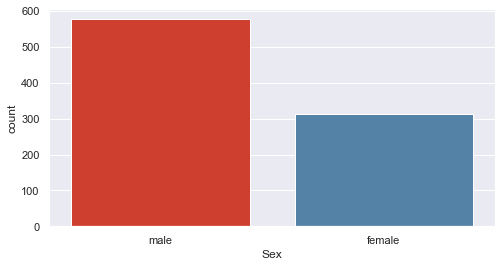

In [130]:
plt.figure(figsize = (8,4))
sns.countplot('Sex', data = df_train)
plt.show()

## Contagem de embarcações

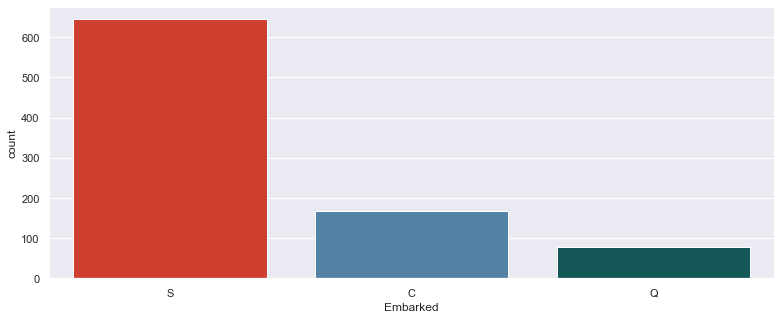

In [131]:
plt.figure(figsize = (13,5))
sns.countplot('Embarked', data = df_train)
plt.show()

Mais pessoas embarcaram no ponto de partida da viagem, diminuindo a quantidade de novos passageiros a cada parada.

## Contagem de sobreviventes

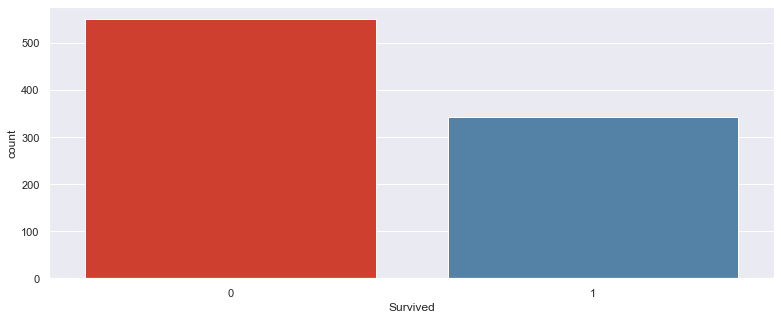

In [132]:
plt.figure(figsize = (13,5))
sns.countplot('Survived', data = df_train)
plt.show()

O número de mortos é maior que o número de sobreviventes.

[]

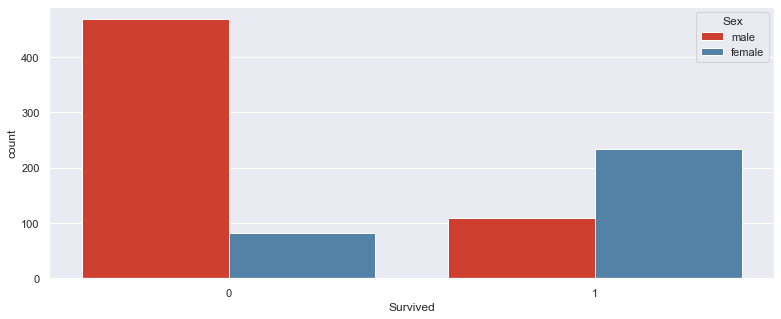

In [133]:
plt.figure(figsize = (13,5))
sns.countplot('Survived', hue = 'Sex', data = df_train)
plt.plot()

O número de mortos do sexo masculino é superior ao sexo feminino. Em contrapartida, o número de sobreviventes do sexo masculino é menor em relação ao sexo feminino.

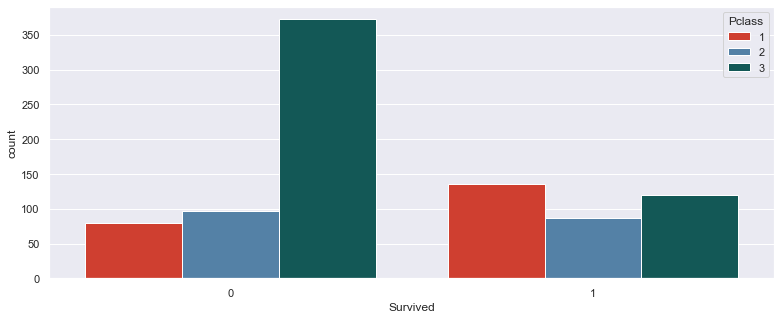

In [128]:
plt.figure(figsize = (13,5))
sns.countplot("Survived", hue = 'Pclass', data = df_train)
plt.show()

Passageiros da terceira classe tiveram mais mortes em relação aos passageiros da primeira classe, que sofreram menos perdas. A taxa de sobrevivência da primeira classe foi maior em relação as demais. A segunda classe obteve menos sobreviventes do que mortos, porém, com pouca diferença.

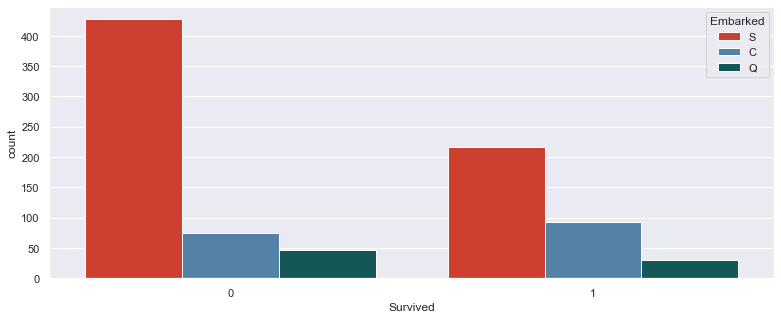

In [134]:
plt.figure(figsize = (13,5))
sns.countplot('Survived', hue = 'Embarked', data = df_train)
plt.show()

Os passageiros embarcados em S tiveram maiores números de mortos, decaindo para os demais passageiros embarcados nos outros dois portos. O comportamento foi igual para o número de sobreviventes.

## Distribuição de frequência de idades

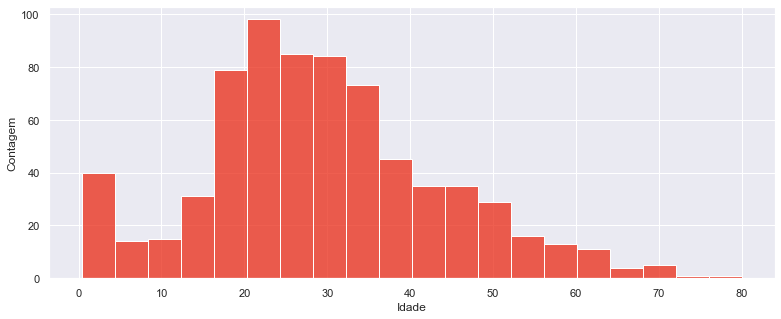

In [156]:
plt.figure(figsize = (13,5))
sns.histplot(data=df_train, x="Age",)
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

## Distribuição de frequências de idade por mortos e sobreviventes

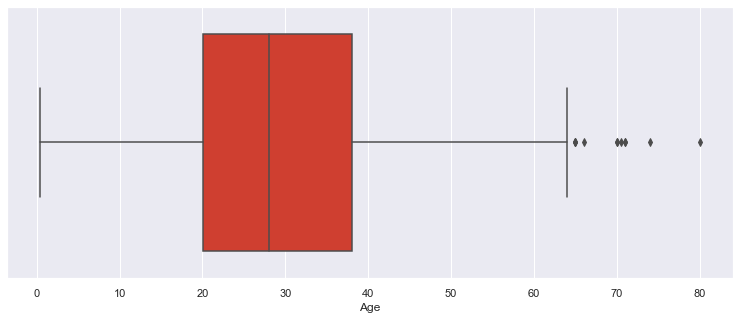

In [157]:
plt.figure(figsize = (13,5))
sns.boxplot('Age', data = df_train)
plt.show()

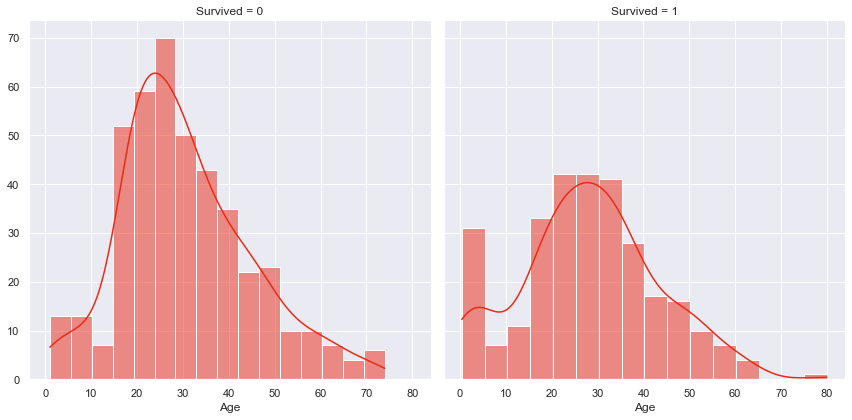

In [158]:
g = sns.FacetGrid(df_train, col='Survived', height=6, aspect=1)
g.map(sns.histplot, 'Age', kde=True)
plt.show()

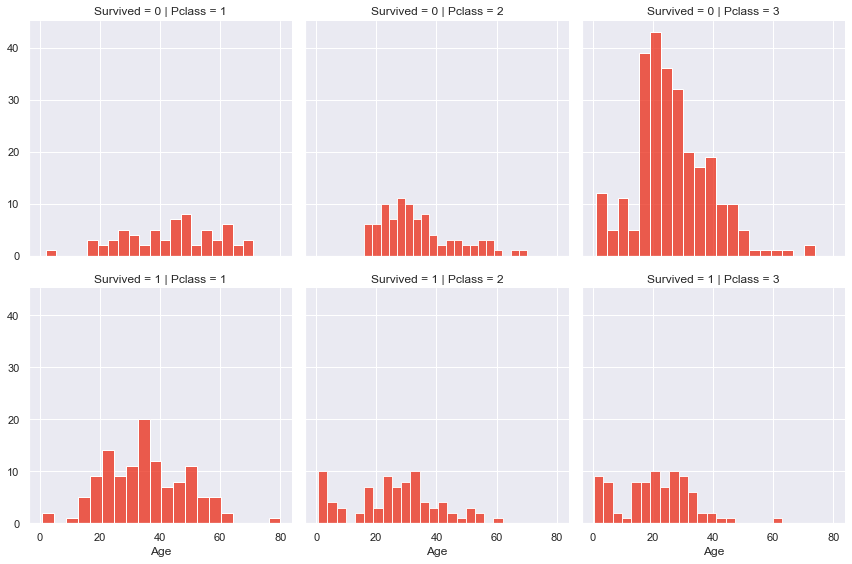

In [159]:
g = sns.FacetGrid(df_train, col='Pclass', row='Survived', height=4, aspect=1)
g.map(sns.histplot, 'Age', bins=20)
plt.show()

## Distribuição de preços dos tickets por classe econômica

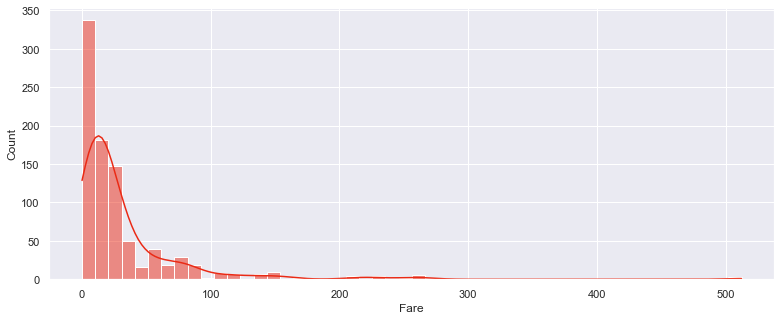

In [160]:
plt.figure(figsize = (13,5))
sns.histplot(data=df_train, x="Fare", kde=True, bins = 50)
plt.show()

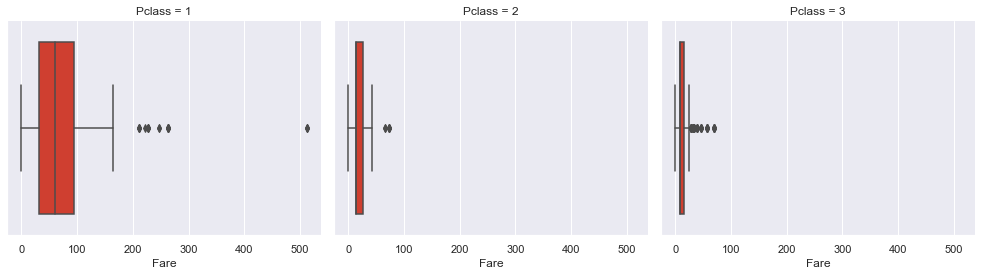

In [161]:
g = sns.FacetGrid(df_train, col='Pclass', height=4, aspect=1.15)
g.map(sns.boxplot, 'Fare')
plt.show()

## Distribuição de preços dos tickets por classe econômica e sexo

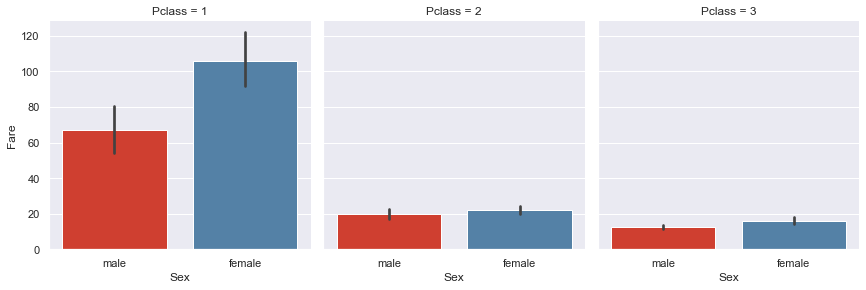

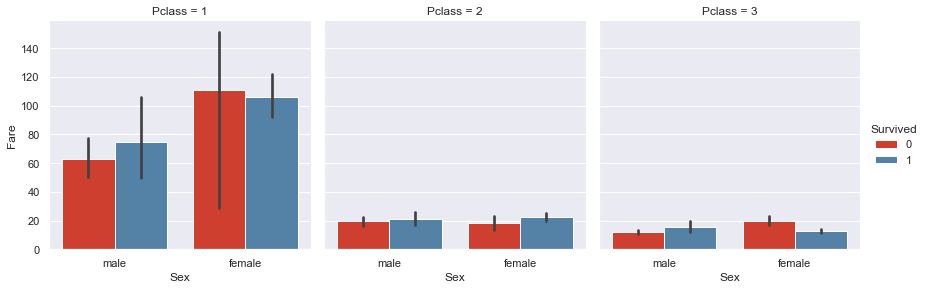

In [162]:
g1 = sns.catplot(x='Sex', y='Fare',
            col='Pclass',
           data=df_train, kind='bar',
           height=4, aspect=1)
g2 = sns.catplot(x='Sex', y='Fare',
            hue='Survived', col='Pclass',
           data=df_train, kind='bar',
           height=4, aspect=1)
plt.show(g1, g2)

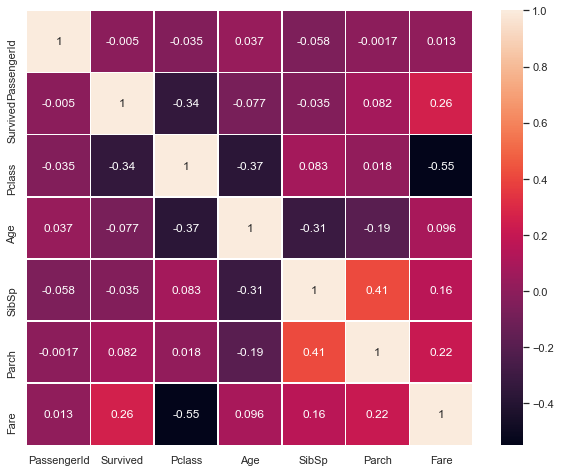

In [163]:
plt.figure(figsize = (10,8))
corr_df_train = df_train.corr()
sns.heatmap(corr_df_train, annot=True, linewidths=.5)
plt.show()

# Identifcação de valores nulos ou ausentes

In [86]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Tratamento de valores nulos